In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
df = pd.read_csv('AirQualityUCI.csv',sep=';',index_col='Date')

In [158]:
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date,,,,,,,,,,,,,,,,
10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [159]:
#the dataset seems awkward, let's process it

In [160]:
df = df.iloc[:,0:14] #removing columns with all null values

In [161]:
df = df.iloc[0:9357,:] # the dataset had all null columns after this row value
df = pd.DataFrame(df)

In [162]:
df.drop(['Time'],axis=1,inplace=True)

In [163]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
10/03/2004,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
10/03/2004,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
10/03/2004,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
10/03/2004,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
10/03/2004,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [164]:
# we have removed the discrepancies in the formatting of the dataset, so now let's analyze our dataset

# no misssing values left

In [165]:
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

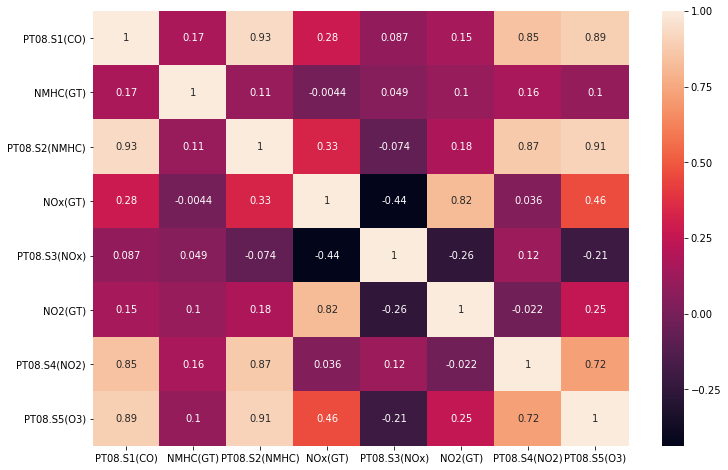

In [166]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

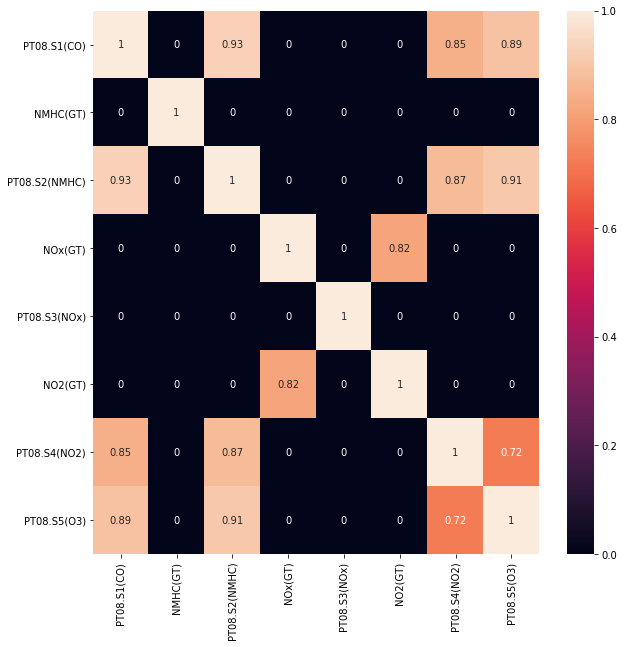

In [167]:
#lets only see data shows a high degree of correlation
plt.figure(figsize=(10,10))
corr_matrix = df.corr()
corr_matrix[np.abs(corr_matrix)<0.6]=0
sns.heatmap(corr_matrix,annot=True)

In [172]:
df.describe() # we see that temp,AH and RH values are not represented here, that's because there are commas instead of decimal and 
#pandas cannot interpret it as an integer.Let's fix that. Although they are not required in an analysis it would be good to have 
#results

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [175]:
df["T"] = df["T"].str.replace(",","").astype(float)

In [177]:
df["T"]=df["T"]/10

In [179]:
df["RH"] = df["RH"].str.replace(",","").astype(float)

In [180]:
df["AH"] = df["AH"].str.replace(",","").astype(float)

In [181]:
df["RH"]=df["RH"]/10
df["AH"]=df["AH"]/10

In [182]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
10/03/2004,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,757.8
10/03/2004,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,725.5
10/03/2004,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,750.2
10/03/2004,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,786.7
10/03/2004,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,788.8


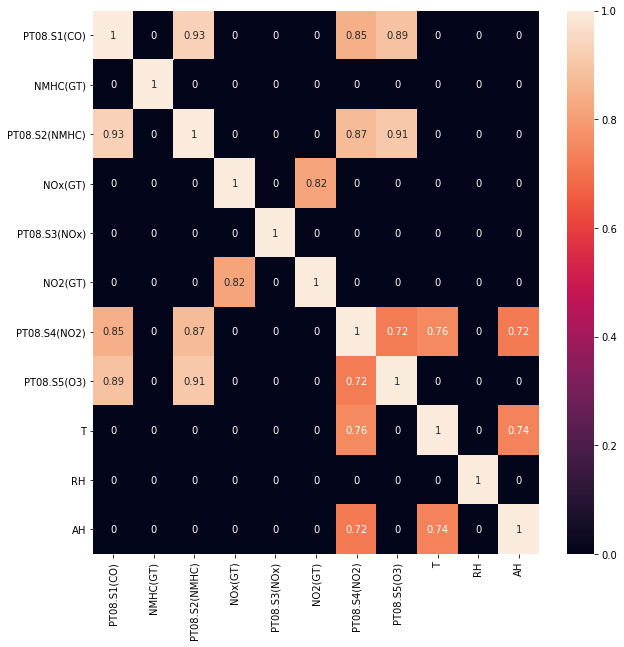

In [183]:
plt.figure(figsize=(10,10))
corr_matrix = df.corr()
corr_matrix[np.abs(corr_matrix)<0.6]=0
sns.heatmap(corr_matrix,annot=True)

In [ ]:
X=df[['PT08.S2(NMHC)']].values

In [188]:
y=df[['PT08.S1(CO)']].values.flatten()

In [184]:
X.shape

(9357, 1)

In [189]:
y.shape

(9357,)

In [190]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [191]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,16.819023,46.526098,984.634252
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,11.408119,21.640764,444.719671
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-20.000000,-20.000000,-20.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,692.300000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,976.800000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1296.200000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2231.000000


In [193]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y= StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1))

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train,X_test,y_train,y_test = train_test_split(X_std,y_std,test_size=0.2,random_state=0)

In [232]:
model.fit(X_std,y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [233]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


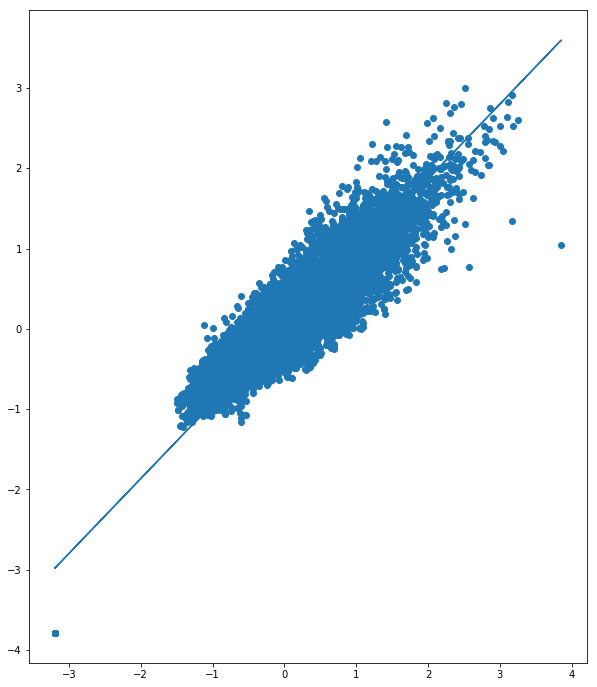

Coefficient estimate :  [[0.93310174]]


In [234]:
# evaluating the model with mean squared error
plt.figure(figsize=(10,12))
plt.scatter(X_std,y_std)
plt.plot(X_std,y_pred)
plt.show()
print('Coefficient estimate : ',model.coef_)

In [200]:
from sklearn.metrics import mean_squared_error

In [201]:
mean_squared_error(y_train,y_train_pred)

0.13019860574692912

In [202]:
mean_squared_error(y_test,y_test_pred)

0.12581617630241104

In [204]:
#evaluating with r2_score

In [205]:
from sklearn.metrics import r2_score

In [206]:
r2_score(y_train,y_train_pred)

0.8698441890203137

In [207]:
r2_score(y_test,y_test_pred)

0.8740173586691458

In [208]:
# the model is pretty accurate if not perfect. Let us plot it out

In [235]:
model.coef_

array([[0.93310174]])

In [236]:
model.intercept_

array([-1.56516043e-16])

In [237]:
#thus we have the equation of one gas with respect to another

In [238]:
#we can similarly analyze the same for other gases and thus reduce the need for various sensor devices